# WAVES Staking

**service**: invest.pepe.team
**product**: WAVES Staking


## APR
**source**: [PyWaves](https://dev.pywaves.org/)

$$ PR_d = \frac{\sum _{i=1} ^{N} fees_i}{\sum _{i=1} ^{N} balance_i} $$

where $PR_d$ - daily profit rate, $fees_i$ - average daily fees of node with index $i$, $balance_i$ - average generating daily balance of node with index $i$, $N$ - count of Waves nodes where $balance_i > 100000$

$$ APR = PR_d \cdot 365 $$

where $APR$ - Annual Percentage Rate 

In [1]:
import requests
from functools import reduce
from datetime import datetime

MIN_GEN_BALANCE = 100000.0
devPyWaves24hData = requests.get(
    'https://dev.pywaves.org/generators/json').json()
filteredDevPyWaves24hData = list(filter(
    lambda item: item['balance'] >= MIN_GEN_BALANCE, devPyWaves24hData))

totalFees = reduce(
    lambda acc, stat: acc + stat['fees'], filteredDevPyWaves24hData, 0.0)
totalGenBalance = reduce(
    lambda acc, stat: acc + stat['balance'], filteredDevPyWaves24hData, 0.0)

PRd = totalFees/totalGenBalance
APR = PRd * 365
print('Date = %s' % (datetime.today().strftime('%d/%m/%Y')))
print('PRd = %5.2f%s' % (PRd*100, '%'))
print('APR = %5.2f%s' % (APR*100, '%'))


Date = 01/12/2022
PRd =  0.03%
APR = 11.73%


## APY

$$ APY = (1 + PR_d)^{365} - 1 $$

where $APY$ - Annual Percentage Yield 

In [2]:
APY = pow(1 + PRd, 365) - 1
print('APY = %5.2f%s' % (APY*100, '%'))


APY = 12.44%


## User APY
- `APY_u` - User APY
- `fee_m` - daily management fee

$$ APY_u = (1 + PR_d \cdot (1-fee_m))^{365} - 1 $$

In [3]:
MANAGEMENT_FEE = 0.025  # 2.5% profit
APYu = pow(1 + PRd *
           (1-MANAGEMENT_FEE), 365) - 1
print('Management fee = %5.1f%s daily profit' % (MANAGEMENT_FEE*100, '%'))
print('User APY = %5.2f%s' % (APYu*100, '%'))


Management fee =   2.5% daily profit
User APY = 12.11%


In [4]:
import requests

COST_NODE = 90
COST_DB = 10
COST_FRONTEND = 10
COST_BACKEND = 15
COST_INFRASTRUCTURE = 25

price_waves = float(requests.get(
    'https://www.binance.com/api/v3/avgPrice?symbol=WAVESUSDT').json()['price'])
cost_total = COST_NODE+COST_DB+COST_FRONTEND+COST_BACKEND+COST_INFRASTRUCTURE
MPRm = pow(1 + PRd *
           MANAGEMENT_FEE, 30) - 1
tvl_min = cost_total / price_waves / MPRm

print('WAVES = %3.2f USDT' % price_waves)
print('Total cost = %d USDT' % cost_total)
print('Month management profit rate = %5.4f%s' % (MPRm * 100, '%'))
print('Min TVL = %d WAVES' % tvl_min)


WAVES = 2.34 USDT
Total cost = 150 USDT
Month management profit rate = 0.0241%
Min TVL = 265972 WAVES


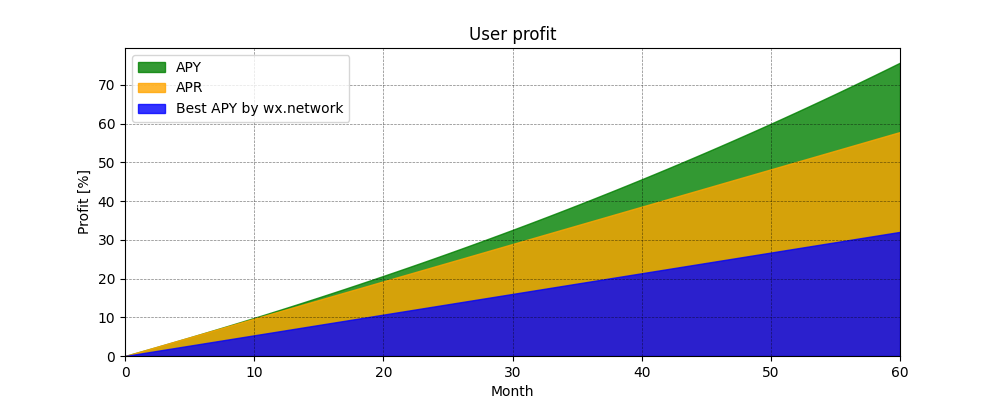

In [5]:
import matplotlib.pyplot as plt

%matplotlib widget
months = list(range(0, 12*5+1, 1))

fig, ax = plt.subplots(figsize=(10, 4))
ax.fill_between(months, list(map(lambda month: (pow(1 + PRd *
                                                    (1-MANAGEMENT_FEE), month*30) - 1) * 100, months)), color='green', label='APY', alpha=0.8)
ax.fill_between(months, list(map(lambda month: PRd*month*30*100, months)),
                color='orange', label='APR', alpha=0.8)
ax.fill_between(months, list(map(lambda month: 0.065/365*month*30*100, months)),
                color='blue', label='Best APY by wx.network', alpha=0.8)

ax.legend(loc='upper left')
ax.set_title('User profit')
ax.set_ylabel('Profit [%]')
ax.set_xlabel('Month')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0, xmax=12*5)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='black')
plt.show()
